# Comparison Analysis

Comparing my algorithm's results vs HCAI's algorithm

In [22]:
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load in Data Sets

### My Algorithm

In [12]:
MSSA_scores = pd.read_csv('MSSA_scores.csv')
MSSA_scores['PCSA'] = MSSA_scores.SCORE.apply(lambda x: 1 if x > 10.25 else 0)
MSSA_scores.info()
MSSA_scores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MSSA_ID                   542 non-null    object 
 1   SCORE                     542 non-null    float64
 2   geometry                  542 non-null    object 
 3   hospital_component        542 non-null    float64
 4   provider_ratio_component  542 non-null    float64
 5   poverty_component         542 non-null    float64
 6   PCSA                      542 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 29.8+ KB


,MSSA_ID,SCORE,geometry,hospital_component,provider_ratio_component,poverty_component,PCSA
0,2i,6.250,MULTIPOLYGON (((596891.8568110325 4146959.7770...,5.250000,1.0,0.0,0
1,78.2h,10.500,"POLYGON ((943117.2514636628 3774099.229127737,...",4.500000,1.0,5.0,1
2,78.2ff,12.000,"POLYGON ((940819.2804903607 3779867.139480735,...",3.000000,5.0,4.0,1
3,78.2ffff,12.143,"POLYGON ((937660.1955009792 3775598.751255609,...",2.142857,5.0,5.0,1
4,78.2mmm,9.500,"POLYGON ((939016.7091778314 3769541.718338449,...",4.500000,0.0,5.0,0


### HCAI Algorithm

In [13]:
url = "https://data.chhs.ca.gov/api/3/action/datastore_search?resource_id=0ba7c904-2302-400a-ba27-b8e8e5c1ab4a&limit=1000"
fileobj = urllib.request.urlopen(url)
response_dict = json.loads(fileobj.read())
PCSA = pd.DataFrame(response_dict["result"]["records"]).drop(columns="_id")
PCSA['PCSA'] = PCSA['PCSA'].map({'Yes': 1, 'No': 0})
PCSA.info()
PCSA.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSA_COUNTY           542 non-null    object 
 1   MSSA_ID               542 non-null    object 
 2   MSSA_NAME             542 non-null    object 
 3   Total_Population      542 non-null    int64  
 4   EST_Physicians        542 non-null    float64
 5   EST_FNPPA             542 non-null    float64
 6   EST_Providers         542 non-null    float64
 7   Provider_Ratio        512 non-null    float64
 8   Score_Provider_Ratio  542 non-null    int64  
 9   Pop_100FPL            542 non-null    int64  
 10  PCT_100FPL            542 non-null    float64
 11  Score_Poverty         542 non-null    int64  
 12  Score_Total           542 non-null    int64  
 13  PCSA                  542 non-null    int64  
 14  Effective Date        542 non-null    object 
dtypes: float64(5), int64(6)

,MSSA_COUNTY,MSSA_ID,MSSA_NAME,Total_Population,EST_Physicians,EST_FNPPA,EST_Providers,Provider_Ratio,Score_Provider_Ratio,Pop_100FPL,PCT_100FPL,Score_Poverty,Score_Total,PCSA,Effective Date
0,Alameda,1.1,Livermore Central and West/Spring Town,58273,46.0,5.0,49.8,1172.5,1,3149,0.054,1,2,0,2020-01-30T00:00:00
1,Alameda,1.2,Altamont/Livermore East/Midway/Mountain House/...,39930,13.5,2.7,15.5,2576.1,4,1774,0.044,0,4,0,2020-01-30T00:00:00
2,Alameda,2a,Berkeley South and West/Emeryville/Oakland Nor...,86595,116.0,78.7,175.0,494.8,0,20908,0.241,4,4,0,2020-01-30T00:00:00
3,Alameda,2b,Albany/Berkeley East and North/Claremont/Cragm...,110451,273.0,39.4,302.6,365.0,0,8701,0.079,1,1,0,2020-01-30T00:00:00
4,Alameda,2c,Oakland West Central,88757,361.0,48.1,397.0,223.6,0,22684,0.256,5,5,1,2020-01-30T00:00:00


## Early Analysis - Counts

In [14]:
# My Algorithm
num_pcsa_personal = sum(MSSA_scores.PCSA)
print(f'Personal Algorithm defines {num_pcsa_personal} MSSAs as shortage areas')

num_pcsa_hcai = sum(PCSA.PCSA)
print(f'HCAI Algorithm defines {num_pcsa_hcai} MSSAs as shortage areas')

Personal Algorithm defines 262 MSSAs as shortage areas
HCAI Algorithm defines 268 MSSAs as shortage areas


#### Division of Scores

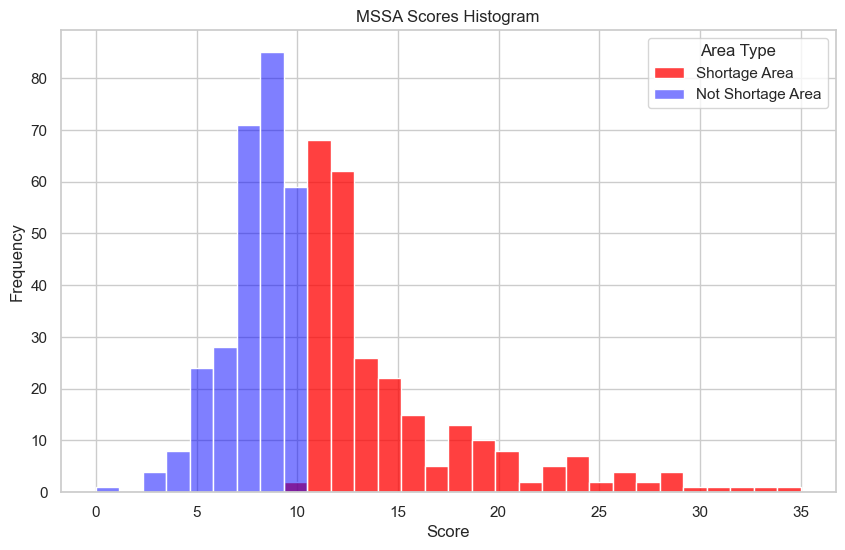

In [30]:
min_score = MSSA_scores['SCORE'].min()
max_score = MSSA_scores['SCORE'].max()
bins = np.linspace(min_score, max_score, 31)  # Create 30 bins

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid", palette="pastel")

# Plot histograms for each category with the same bins
shortage_area_col = 'PCSA'  # Adjust if necessary
if shortage_area_col in MSSA_scores.columns:
    sns.histplot(data=MSSA_scores[MSSA_scores[shortage_area_col] == 1], x='SCORE', color='red', label='Shortage Area', kde=False, bins=bins)
    sns.histplot(data=MSSA_scores[MSSA_scores[shortage_area_col] == 0], x='SCORE', color='blue', label='Not Shortage Area', kde=False, bins=bins, alpha=0.5)
else:
    print(f"Column '{shortage_area_col}' not found in DataFrame")

# Add title and labels
plt.title("MSSA Scores Histogram")
plt.xlabel("Score")
plt.ylabel("Frequency")

# Add legend
plt.legend(title='Area Type')

# Show plot
plt.savefig('MSSA_scores_hist.jpg')
plt.show()

#### CDF Plot

<Axes: xlabel='SCORE', ylabel='Proportion'>

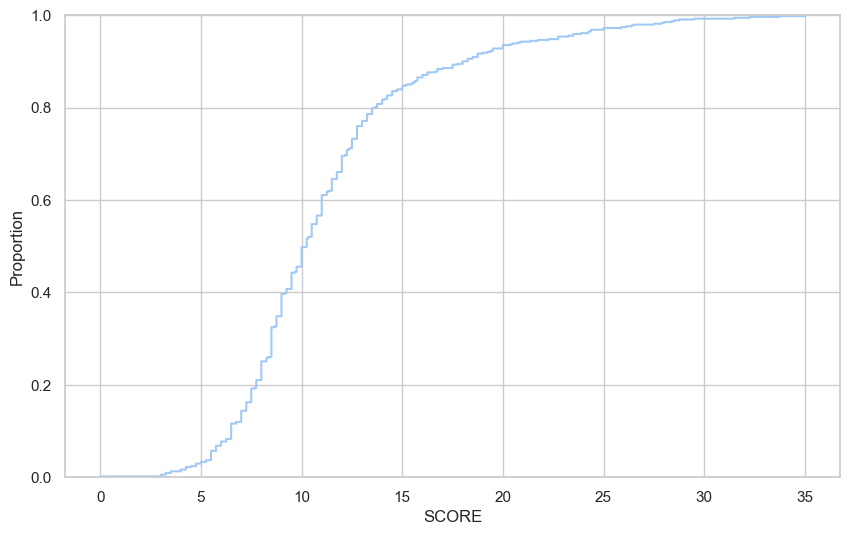

In [28]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid", palette="pastel")
sns.ecdfplot(MSSA_scores.SCORE)